### About Problem

##### Context
Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

##### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Statistical Library
import scipy.stats as stats

pd.set_option("display.max_columns", 50)

### 2. Load the dataset and perform exploratory data analysis.

In [2]:
telco_churn = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [3]:
# Check the Shape of the Data
telco_churn.shape

(7043, 21)

In [4]:
# Check the Info of the Data
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Convert Total Charges into Numerical var
telco_churn["TotalCharges"] = pd.to_numeric(telco_churn.TotalCharges, errors = "coerce")

In [6]:
# Lets preview the Dataset

telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Lets analyse Target variable...
telco_churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
# Convert Target variable Churn into 1 and 0

dict_map = {"Yes":1, "No":0}
telco_churn["Churn"] = telco_churn.Churn.map(dict_map)

In [9]:
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
telco_churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Missing Value Treatment

In [11]:
telco_churn.loc[telco_churn.TotalCharges.isnull()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0


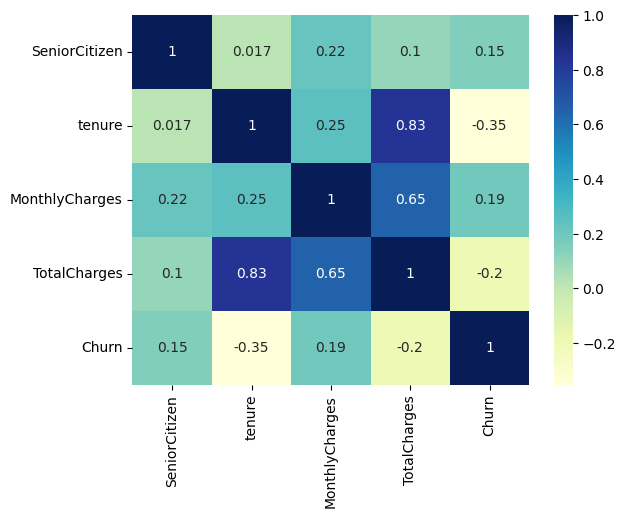

In [16]:
# Check the correlation between the Numerical Variables

sns.heatmap(telco_churn.select_dtypes(include = np.number).corr(), annot = True, cmap = "YlGnBu")
plt.show()

Basis above Correlation Plot, we can see that the Total Charges has ``Negative Correlation`` with Churn and has some correlation with ``Monthly Charges`` and ``tenure``. So, now we can build a model that can help us fill the missing values

In [17]:
# Lets create a local dataframe for the purpose of dealing with the missing values

# This DataFrame would not contain any missing values and only then we would be able to train
# a Model and use that model to deal with the missing values.

local_df_missing = telco_churn.loc[:, ["tenure", "MonthlyCharges", "TotalCharges"]].dropna()


In [18]:
# Use the Above DataFrame to Build the Model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

X = local_df_missing.loc[:, ["tenure", "MonthlyCharges"]]
y = local_df_missing.TotalCharges
rf.fit(X, y)

RandomForestRegressor()

In [19]:
# Lets Deploy the Model to Treat the Missing Values

ids = telco_churn.loc[telco_churn.TotalCharges.isnull()].index.tolist()

for i in ids:
  # Reshape the input data to a 2D array
    input_data = telco_churn.loc[i, ["tenure", "MonthlyCharges"]].values.reshape(1, -1)
    prediction = rf.predict(input_data)
    telco_churn.loc[i, "TotalCharges"] = prediction
  # telco_churn.loc[i, "TotalCharges"] = rf.predict(telco_churn.loc[i, ["tenure", "MonthlyCharges"]])

In [20]:
telco_churn.isnull().sum().sum()

# Now We dont have any missing values.

np.int64(0)

### 3. Pre-process the data by converting categorical variables to numerical variables, and scaling the data.

In [21]:
ids = []
for i in telco_churn.customerID:
  ids.append(i.split("-")[1])

pd.Series(ids).value_counts() # IDs is not making any sense for the data thus, not including the IDS for the modelling.

,count
VUVJN,2
GSODA,2
CYWMH,2
WQKSZ,1
LLFYV,1
...,...
TSPVK,1
TEVTT,1
NSEDU,1
BWBML,1


<Axes: xlabel='Churn'>

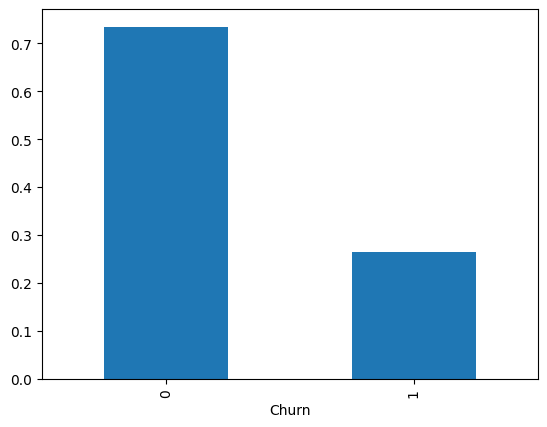

In [22]:
# Check the Pattern of Churn
telco_churn.Churn.value_counts(normalize = True).plot(kind = "bar")

# Approx 75% of the People are still with the company where as Approx 25% people have churned.

<Axes: xlabel='gender'>

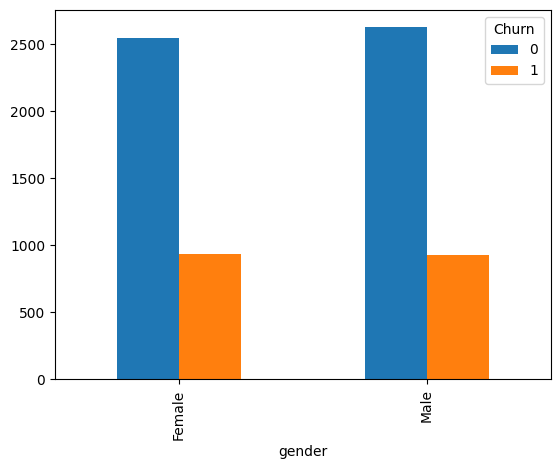

In [23]:
# Gender of the Customer who Churns
pd.crosstab(telco_churn.gender, telco_churn.Churn).plot(kind = "bar")

# There is no difference between the Churn Basis Gender

Lets Perform Hypothesis Testing on Churn and Gender

* Ho: There is no relation between Churn and Gender.
* Ha: There is some relation between Churn and Gender.

Note: Since both are Categorical Variables, we will be applying the Chi Square Test.

In [24]:
tbl = pd.crosstab(telco_churn.gender, telco_churn.Churn)

teststats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
print("Test Stats: ", teststats)
print("P Value: ", pvalue)

# Since the Pvalue is Greater than 0.05, We Fail to Reject the Ho.
# It Means that Gender has no relation with the Churn or Churn is not affected with the Gender.

Test Stats:  0.4840828822091383
P Value:  0.48657873605618596


### Apply Statistical test to check the Relation between Categorical Variables and Churn

Since both the variables are categorical in nature, we will be apply Chi Square Test to check the Significance of the Variable for the Modelling.

In [25]:
telco_churn.select_dtypes(include = "object").columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [26]:
cat_vars = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']

significant_feats = []
for i in cat_vars:
    tbl = pd.crosstab(telco_churn.loc[:, i], telco_churn.Churn)
    teststats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
    if pvalue<0.05:
        significant_feats.append(i)

print("Count of Significant Features: ", len(significant_feats))
print("Significant Features: ", significant_feats)

Count of Significant Features:  13
Significant Features:  ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


**Creating a DataFrame with Important Features Only**

In [27]:
# Data Frame with Significant Features only
imp_feats = pd.get_dummies(telco_churn.loc[:, significant_feats],
                           drop_first = True)

In [28]:
# Adding all the Numerical Variables
imp_feats["tenure"] = telco_churn["tenure"]
imp_feats["MonthlyCharges"] = telco_churn["MonthlyCharges"]
imp_feats["TotalCharges"] = telco_churn["TotalCharges"]

In [29]:
imp_feats.head()

,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,1,29.85,29.85
1,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,34,56.95,1889.50
2,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,2,53.85,108.15
3,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,45,42.30,1840.75
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,2,70.70,151.65


### Numerical Variables

<Axes: ylabel='tenure'>

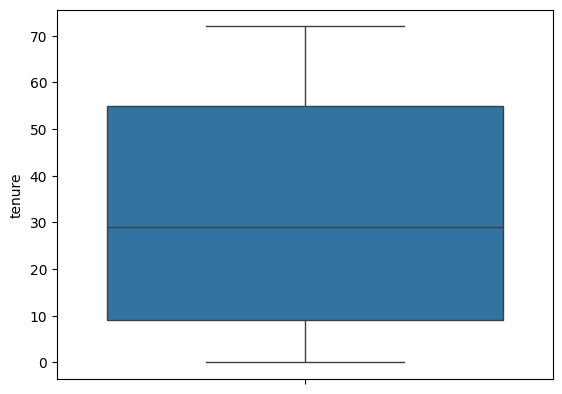

In [30]:
sns.boxplot(imp_feats["tenure"])

<Axes: ylabel='TotalCharges'>

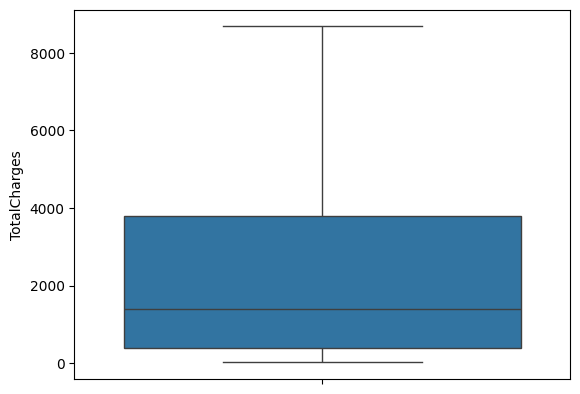

In [31]:
sns.boxplot(imp_feats["TotalCharges"])

Since there is no Presence of the Outliers...We can apply Min max Scaling as Min value would be 0 and Max Value would be 1.


### 4. Split the data set in train (80%) and test (20%) sets. Train the model using the training set.

In [32]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(imp_feats, telco_churn.Churn,
                                                test_size = 0.20, random_state = 24)

print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(5634, 27) (5634,) (1409, 27) (1409,)


In [33]:
xtrain.head()

,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
5143,True,True,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,True,False,True,False,False,True,49,87.20,4345.0
2387,False,False,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,True,False,5,105.30,550.6
4752,False,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,23,20.45,481.1
1066,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,True,47,19.65,973.1
2635,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,True,63,25.25,1559.3


### Scaling the Xtrain and Xtest using Min Max Scaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

for i in ["tenure", "MonthlyCharges", "TotalCharges"]:
    xtrain.loc[:, i] = minmax.fit_transform(pd.DataFrame(xtrain.loc[:, i]))
    xtest.loc[:, i] = minmax.transform(pd.DataFrame(xtest.loc[:, i]))

### 5. Build a neural-network model using PyTorch (or other library of your choice) to predict customer churn.

In [35]:
import tensorflow as tf

In [36]:
# Build the neural network model using TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtrain, ytrain, epochs=50, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(xtest, ytest)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7278 - loss: 0.5114
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8107 - loss: 0.4173
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.4247
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7979 - loss: 0.4222
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8067 - loss: 0.4239
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8024 - loss: 0.4155
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8064 - loss: 0.4152
Epoch 8/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8102 - loss: 0.4052
Epoch 9/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8046 - loss: 0.3990
Epoch 10/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8093 - loss: 0.4065
Epoch 11/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8113 - loss: 0.4061
Epoch 12/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

### 6. Evaluate the model using the testing set and report the accuracy, precision, recall, and F1 score.

In [40]:
from sklearn.metrics import classification_report

# Make predictions
predictions = model.predict(xtest)

predictions = (predictions > 0.5).astype(int)

print(classification_report(ytest, predictions))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1057
           1       0.59      0.54      0.57       352

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.79      0.79      0.79      1409



In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=27),
    tf.keras.layers.Dense(64, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(64, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

# Train the model
model.fit(xtrain, ytrain, epochs=50, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(xtest, ytest)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(xtest)

predictions = (predictions > 0.5).astype(int)

print(classification_report(ytest, predictions))

Epoch 1/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Recall: 0.3632 - loss: 0.4818
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5363 - loss: 0.4168
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.5224 - loss: 0.4101
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5156 - loss: 0.4215
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Recall: 0.5573 - loss: 0.4057
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5199 - loss: 0.4108
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Recall: 0.5112 - loss: 0.4100
Epoch 8/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5373 - loss: 0.3867
Epoch 9/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.5559 - loss: 0.4057
Epoch 10/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5922 - loss: 0.3800
Epoch 11/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Recall: 0.5508 - loss: 0.3939
Epoch 12/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5638 - lo

In [51]:
!pip install -q scikeras --upgrade
!pip install -q scikit-learn --upgrade

In [52]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras.wrappers

# Define a function to create the model
def create_model(activation='relu', neurons=10, optimizer='adam'):
    model = tf.keras.models.Sequential([ # Use tf.keras.models.Sequential
        tf.keras.layers.Dense(neurons, activation=activation, input_dim=27), # Use tf.keras.layers.Dense
        tf.keras.layers.Dense(1, activation='sigmoid') # Use tf.keras.layers.Dense
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier with the create_model function
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'activation': ['relu', 'tanh'],
    'neurons': [10, 20, 30],
    'optimizer': ['adam', 'sgd']
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(xtrain, ytrain)

# Print best parameters and performance
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [53]:
# Best: 0.802272 using {'activation': 'tanh', 'neurons': 30, 'optimizer': 'sgd'}

# Loop over a range of neuron counts in a layer
for neurons in [5, 10, 20, 50, 100]:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(neurons, activation='relu', input_shape=(xtrain.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest), verbose=0)

    print(f'Neurons: {neurons}, Validation Accuracy: {history.history["val_accuracy"][-1]}')

Neurons: 5, Validation Accuracy: 0.8126330971717834
Neurons: 10, Validation Accuracy: 0.8126330971717834
Neurons: 20, Validation Accuracy: 0.8147622346878052
Neurons: 50, Validation Accuracy: 0.8190205693244934
Neurons: 100, Validation Accuracy: 0.8176011443138123


By Looping over different Neuron Count, we can say 50 Neurons shall be Optimum.

In [54]:
# Loop over a range of layer counts
for num_layers in [1, 2, 3, 4, 5]:
    model = tf.keras.models.Sequential()

    # Add the first layer with input shape
    model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(xtrain.shape[1],)))

    # Add additional hidden layers
    for _ in range(num_layers - 1):
        model.add(tf.keras.layers.Dense(10, activation='relu'))

    # Add the output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest), verbose=0)

    print(f'Layers: {num_layers}, Validation Accuracy: {history.history["val_accuracy"][-1]}')


Layers: 1, Validation Accuracy: 0.813342809677124
Layers: 2, Validation Accuracy: 0.8112136125564575
Layers: 3, Validation Accuracy: 0.8126330971717834
Layers: 4, Validation Accuracy: 0.8168914318084717
Layers: 5, Validation Accuracy: 0.8154719471931458


By looping over different layers, we find that No of Layers ==4 shall be optimum.

**7. Experiment with different hyperparameters (layer count and neurons per layer) and architectures to improve the performance of the model.**

In [55]:
# Lets find another model with 3 Layers and 64 Neurons
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=27),
    tf.keras.layers.Dense(64, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(64, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(64, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtrain, ytrain, epochs=50, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(xtest, ytest)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Make predictions
#predictions = model.predict_classes(xtest)

Epoch 1/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7379 - loss: 0.5035
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7907 - loss: 0.4346
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7974 - loss: 0.4248
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7986 - loss: 0.4263
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8016 - loss: 0.4271
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7958 - loss: 0.4267
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8063 - loss: 0.4042
Epoch 8/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8007 - loss: 0.4178
Epoch 9/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.3868
Epoch 10/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8168 - loss: 0.3856
Epoch 11/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8129 - loss: 0.3970
Epoch 12/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [59]:
# Lets find another model with 3 Layers and 64 Neurons with activation = LeakyRelu
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='leaky_relu', input_dim=27),
    tf.keras.layers.Dense(64, activation='leaky_relu'),  # Additional hidden layer
    tf.keras.layers.Dense(64, activation='leaky_relu'),  # Additional hidden layer
    tf.keras.layers.Dense(64, activation='leaky_relu'),  # Additional hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

# Train the model
model.fit(xtrain, ytrain, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(xtest, ytest)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(xtest)

predictions = (predictions > 0.5).astype(int)

print(classification_report(ytest, predictions))

Epoch 1/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Recall: 0.3896 - loss: 0.4825
Epoch 2/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5147 - loss: 0.4229
Epoch 3/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Recall: 0.5287 - loss: 0.4109
Epoch 4/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Recall: 0.5334 - loss: 0.4159
Epoch 5/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.5197 - loss: 0.4171
Epoch 6/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Recall: 0.5094 - loss: 0.4134
Epoch 7/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5290 - loss: 0.4088
Epoch 8/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Recall: 0.5176 - loss: 0.4143
Epoch 9/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Recall: 0.5347 - loss: 0.4105
Epoch 10/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.5633 - loss: 0.4172
Epoch 11/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5346 - loss: 0.3988
Epoch 12/45
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Recall: 0.5583 - lo

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
# Variable to store best model
best_model = None
best_accuracy = 0.0

# Loop through different configurations to find the best layer and neuron count
for num_layers in [2, 3, 4]:
    for neurons in [32, 64, 128]:

        # Create model
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(neurons, activation='relu', input_shape=(xtrain.shape[1],)))

        for _ in range(num_layers - 1):
            model.add(tf.keras.layers.Dense(neurons, activation='relu'))

        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

        # Compile model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train model
        history = model.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

        # Evaluate on test set
        test_loss, test_accuracy = model.evaluate(xtest, ytest, verbose=0)

        print(f'Layers: {num_layers}, Neurons: {neurons}, Test Accuracy: {test_accuracy}')

        # Save the best model configuration
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

# After loop ends, best_model will contain the model with highest test accuracy
print("Best Model's Test Accuracy: ", best_accuracy)

Layers: 2, Neurons: 32, Test Accuracy: 0.8105039000511169
Layers: 2, Neurons: 64, Test Accuracy: 0.793470561504364
Layers: 2, Neurons: 128, Test Accuracy: 0.7665010690689087
Layers: 3, Neurons: 32, Test Accuracy: 0.7941802740097046
Layers: 3, Neurons: 64, Test Accuracy: 0.7636621594429016
Layers: 3, Neurons: 128, Test Accuracy: 0.7750177383422852
Layers: 4, Neurons: 32, Test Accuracy: 0.779985785484314
Layers: 4, Neurons: 64, Test Accuracy: 0.7757274508476257
Layers: 4, Neurons: 128, Test Accuracy: 0.7594038248062134
Best Model's Test Accuracy:  0.8105039000511169


In [ ]:
best_model

NameError: ignored